In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv(r"C:\Users\Thushar Mohan\OneDrive\Desktop\Python Sample Data\Regression\diabetes2.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

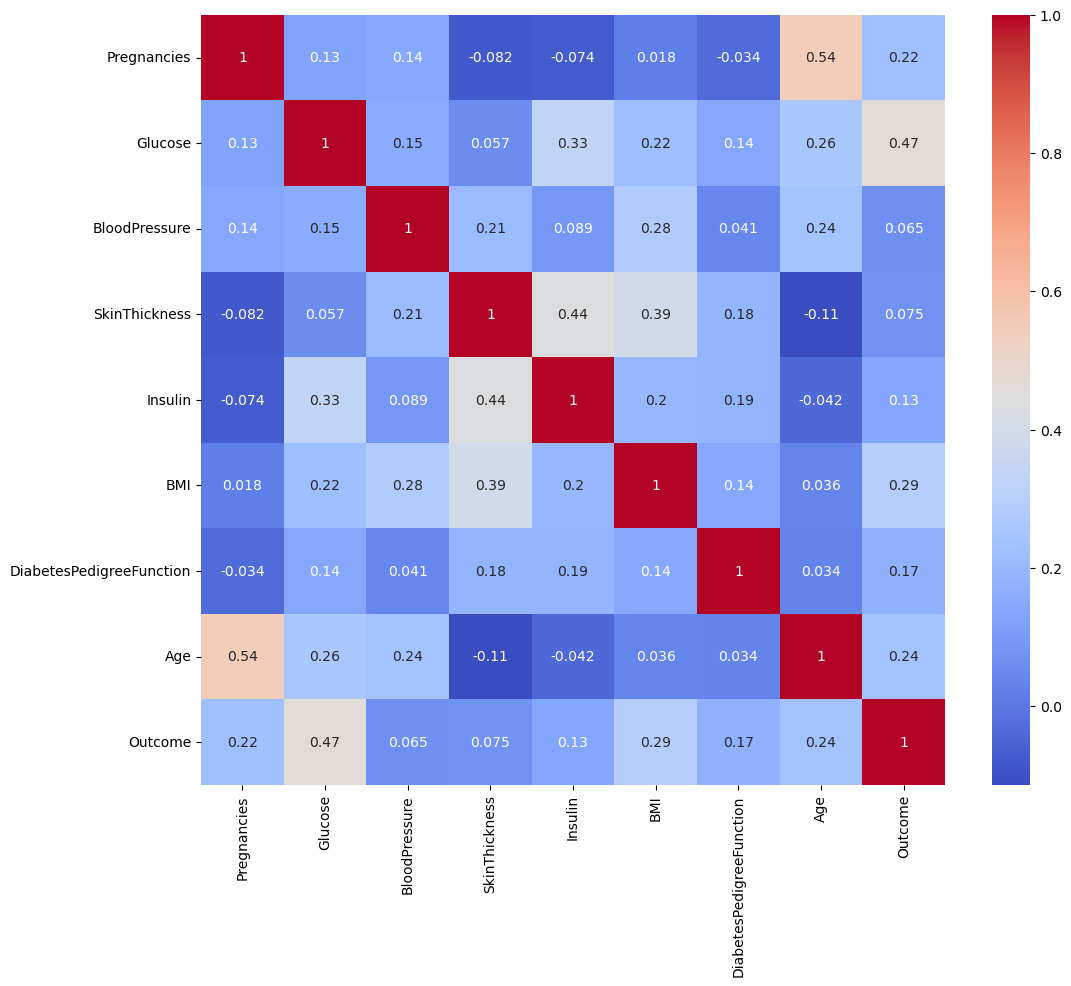

In [7]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', ax=ax, annot=True)
plt.show()

In [8]:
x = df.iloc[:,:8].values
y = df.iloc[:,-1].values

In [10]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x  =sc.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(x_train, y_train)

LogisticRegression()

In [14]:
y_pred = classifier.predict(x_test)

In [16]:
df1 = pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred})

In [17]:
df

,Actual Values,Predicted Values
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
187,1,0
188,1,0
189,0,0
190,0,0


In [18]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[118  12]
 [ 26  36]]


<Axes: >

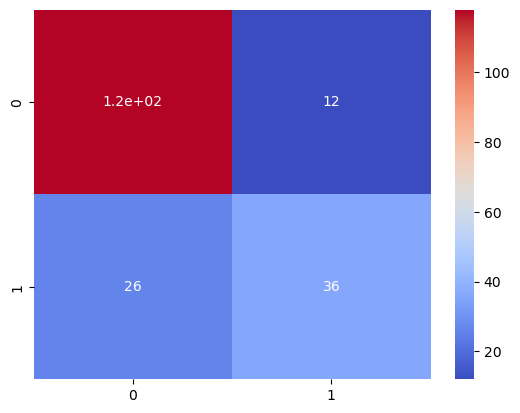

In [19]:
sns.heatmap(cm, annot=True, cmap='coolwarm')

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192

